In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../../Datasets/credit_dataset.csv')
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,38,52,8,0


---

In [2]:
mask = df['TARGET'].value_counts()
mask.to_frame()

,TARGET
0,24712
1,422


In [3]:
df['TARGET'].isnull().sum()

0

<AxesSubplot:ylabel='TARGET'>

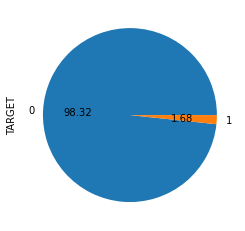

In [4]:
mask.plot.pie(autopct = '%.2f')

In [5]:
class_0 = df[df['TARGET'] == 0]
class_1 = df[df['TARGET'] == 1]

In [6]:
class_0.shape

(24712, 20)

In [7]:
class_1.shape

(422, 20)

## pre-processing

In [8]:
df.drop(['Unnamed: 0','ID'], axis = 1, inplace = True)
df.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,29,59,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,4,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,38,52,8,0


In [9]:
print(df['GENDER'].unique())

['M' 'F']


In [10]:
encoder = LabelEncoder()
df['GENDER'] = encoder.fit_transform(df['GENDER'])
df['CAR'] = encoder.fit_transform(df['CAR'])
df['REALITY'] = encoder.fit_transform(df['REALITY'])
df.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,29,59,3,0
1,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,4,52,8,0
2,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
3,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
4,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,38,52,8,0


In [11]:
print(df['INCOME_TYPE'].unique())

['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']


In [12]:
print(df['EDUCATION_TYPE'].unique())

['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [13]:
print(df['FAMILY_TYPE'].unique())

['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']


In [14]:
print(df['HOUSE_TYPE'].unique())

['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


In [15]:
df['INCOME_TYPE'] = encoder.fit_transform(df['INCOME_TYPE'])
df['EDUCATION_TYPE'] = encoder.fit_transform(df['EDUCATION_TYPE'])
df['FAMILY_TYPE'] = encoder.fit_transform(df['FAMILY_TYPE'])
df['HOUSE_TYPE'] = encoder.fit_transform(df['HOUSE_TYPE'])
df.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,2,29,59,3,0
1,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1,4,52,8,0
2,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1,26,52,8,0
3,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1,26,52,8,0
4,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1,38,52,8,0


In [16]:
cols = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns = cols)
df.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1.0,1.0,1.0,0.0,0.055233,1.0,1.0,0.25,0.2,0.0,0.0,0.0,0.0,0.052632,0.483333,0.826087,0.069767,0.0
1,0.0,0.0,1.0,0.0,0.156977,0.0,1.0,0.75,0.2,0.0,0.0,1.0,1.0,0.000000,0.066667,0.673913,0.186047,0.0
2,0.0,0.0,1.0,0.0,0.156977,0.0,1.0,0.75,0.2,0.0,0.0,1.0,1.0,0.000000,0.433333,0.673913,0.186047,0.0
3,0.0,0.0,1.0,0.0,0.156977,0.0,1.0,0.75,0.2,0.0,0.0,1.0,1.0,0.000000,0.433333,0.673913,0.186047,0.0
4,0.0,0.0,1.0,0.0,0.156977,0.0,1.0,0.75,0.2,0.0,0.0,1.0,1.0,0.000000,0.633333,0.673913,0.186047,0.0


In [17]:
x = df.iloc[:,:-1]
x.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
0,1.0,1.0,1.0,0.0,0.055233,1.0,1.0,0.25,0.2,0.0,0.0,0.0,0.0,0.052632,0.483333,0.826087,0.069767
1,0.0,0.0,1.0,0.0,0.156977,0.0,1.0,0.75,0.2,0.0,0.0,1.0,1.0,0.000000,0.066667,0.673913,0.186047
2,0.0,0.0,1.0,0.0,0.156977,0.0,1.0,0.75,0.2,0.0,0.0,1.0,1.0,0.000000,0.433333,0.673913,0.186047
3,0.0,0.0,1.0,0.0,0.156977,0.0,1.0,0.75,0.2,0.0,0.0,1.0,1.0,0.000000,0.433333,0.673913,0.186047
4,0.0,0.0,1.0,0.0,0.156977,0.0,1.0,0.75,0.2,0.0,0.0,1.0,1.0,0.000000,0.633333,0.673913,0.186047


In [18]:
y = df.iloc[:,-1:]
y.head()

,TARGET
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [19]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 1)
x_rus, y_rus = rus.fit_resample(x, y)

In [20]:
y_rus.value_counts().to_frame()

,0
TARGET,
0.0,422
1.0,422


In [21]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 'not majority')
x_ros, y_ros = ros.fit_resample(x, y)

In [22]:
y_ros.value_counts().to_frame()

,0
TARGET,
0.0,24712
1.0,24712


In [23]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy = 'majority')
x_tl, y_tl = tl.fit_resample(x, y)

In [24]:
y_tl.value_counts().to_frame()

,0
TARGET,
0.0,24587
1.0,422


In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [26]:
y_smote.value_counts().to_frame()

,0
TARGET,
0.0,24712
1.0,24712


In [27]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x, y)

In [28]:
y_nm.value_counts().to_frame()

,0
TARGET,
0.0,422
1.0,422
